In [10]:
pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [12]:
directory = os. getcwd()

In [13]:
filepaths=[]
for subdir, dirs, files in os.walk(directory):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file

        if filepath.endswith(".txt"):
            filepaths.append(filepath)

In [14]:
len(filepaths)

1136

In [15]:
tup =[]
for file_path in filepaths: 
    f = open(file_path,'r')
    A = f.read().replace('\n',' ')
    course_number = file_path[47:50]
    if len(A) < 40000: #split long transcripts into two lines 
        tup.append((course_number,A))
    else: 
        tup.append((course_number,A[:len(A)//2]))
        tup.append((course_number,A[len(A)//2:]))
 

In [16]:
df = pd.DataFrame(tup,columns=['course_number','transcripts'])

In [17]:
df['length'] = df['transcripts'].str.len()

(array([157., 290., 203., 146., 107., 140.,  71.,  48.,  55.,  14.]),
 array([    0. ,  4295.7,  8591.4, 12887.1, 17182.8, 21478.5, 25774.2,
        30069.9, 34365.6, 38661.3, 42957. ]),
 <BarContainer object of 10 artists>)

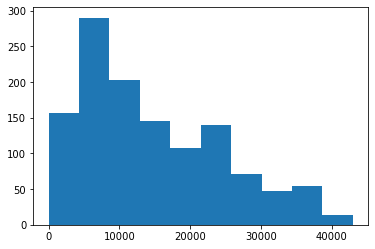

In [18]:
plt.hist(df.length)

In [19]:
# delete lines which does not include any transcripts
df = df[df.length != 0] 
df

,course_number,transcripts,length
0,630,Hi and welcome to the Master of Applied Data S...,3079
1,630,"All right. So, I got a question in the forum f...",9387
2,630,"Hi, Daniel. Hello, Cohan. Hi. How are you? Ver...",20115
3,630,"the red line. Now, next time we draw another 5...",20116
4,630,"In this video, we're going to take a closer lo...",16163
...,...,...,...
1226,680,"In this lecture, we're talking specifically ab...",26960
1227,680,"In this lecture, we're going to be talking abo...",12210
1228,680,"Record. Alright, looks like we're recording on...",20241
1229,680,n math and so the idea is if you were in two d...,20242


# LDA w/o data cleaning

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(use_idf=False,stop_words='english',min_df=3,ngram_range=(3,4))
X = vectorizer.fit_transform(df['transcripts'])
lda = LatentDirichletAllocation(n_components=10,random_state=42)
lda.fit_transform(X)

array([[0.01907484, 0.01907536, 0.01908296, ..., 0.01907463, 0.01907441,
        0.01907453],
       [0.01336785, 0.0133687 , 0.87968663, ..., 0.01336841, 0.01336769,
        0.01336768],
       [0.01085598, 0.01085715, 0.01086014, ..., 0.01085983, 0.90226857,
        0.01085506],
       ...,
       [0.01148085, 0.01147675, 0.42764454, ..., 0.01147654, 0.01147807,
        0.48053467],
       [0.01249499, 0.01249248, 0.39517713, ..., 0.01249454, 0.01249228,
        0.01249278],
       [0.02095995, 0.81135166, 0.02096103, ..., 0.02096025, 0.0209614 ,
        0.02096109]])

In [22]:
feature_names = vectorizer.get_feature_names()
feature_names

/Users/zhouwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00 00 05',
 '00 pm eastern',
 '00 pm eastern time',
 '000 000 000',
 '000 10 000',
 '000 100 000',
 '000 dimensional vector',
 '000 lines code',
 '05 fulltext sql',
 '06 python sql',
 '10 000 10',
 '10 000 columns',
 '10 000 dimensional',
 '10 000 dimensional vector',
 '10 000 lines',
 '10 000 rows',
 '10 000 times',
 '10 000 words',
 '10 11 12',
 '10 11 12 13',
 '10 15 20',
 '10 15 minutes',
 '10 20 30',
 '10 data points',
 '10 fold cross',
 '10 fold cross validation',
 '10 percent time',
 '10 points 10',
 '10 years ago',
 '100 000 people',
 '100 000 rows',
 '100 different ways',
 '100 just going',
 '100 percent sure',
 '100 percent time',
 '100 times going',
 '100 years ago',
 '1000 data points',
 '11 12 13',
 '11 12 13 14',
 '12 13 14',
 '14 year old',
 '15 20 minutes',
 '15 20 years',
 '15 years ago',
 '16 17 18',
 '16 17 18 19',
 '17 18 19',
 '1st 2nd 3rd',
 '20 30 years',
 '20 30 years old',
 '20 percent time',
 '20 years ago',
 '20 years later',
 '2016 presidential election',


In [23]:
topic_list=[]
for topic_idx, topic in enumerate(lda.components_):
    top_n = [feature_names[i] for i in topic.argsort()[-10:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(top_n) 

In [24]:
topic_list

[['있습니다 예를 들어',
  'talk little bit',
  'blah blah blah',
  '기계 학습 문제를',
  'want make sure',
  'inter quartile range',
  'does make sense',
  'just make sure',
  'blah blah blah blah',
  'hi paramveer dhillon'],
 ['just little bit',
  'talk little bit',
  'beer milk lemon',
  'word sense disambiguation',
  'example lab field',
  'pattern beer milk',
  'want make sure',
  'does make sense',
  'little bit different',
  'itemset beer milk'],
 ['want make sure',
  'does make sense',
  'talk little bit',
  'just little bit',
  'just make sure',
  'little bit different',
  'like don know',
  'data science ethics',
  'yeah don know',
  'make sense yeah'],
 ['unigram language model',
  'large world uncertainty',
  'let look example',
  'small world uncertainty',
  'little bit different',
  'real world data',
  'things little bit',
  'node link diagrams',
  'blah blah blah',
  'talk little bit'],
 ['average treatment effect',
  'let look example',
  'methods data science',
  'treatment control g

# LDA w/ data cleaning

In [46]:
from gensim.models.word2vec import Word2Vec
from tqdm.notebook import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhouwei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/zhouwei/nltk_data...


True

In [35]:
#en = spacy.load('en_core_web_sm')
#sw_spacy = en.Defaults.stop_words
stop_words = list(set(stopwords.words('english')))

# create a list of domain knowledge words, for example, data, science, analytics,etc 
#This is an iterative process: continusouly add new item to this set after generating topics that should belong to stopwords
domain_words = set(('00','talk','blah','etc','data','science','look','little','yeah','like','ask','actually','hi',
                    'know','going','want','welcome','thank','think','understand','office','thing','got','let','michigan',
                    'screen','df')) 


In [36]:
stop_words = set(stop_words)|domain_words
len(stop_words)

206

In [43]:
df=df.drop(index=[682,706,710]) #remove transcripts not in English

In [44]:
df.reset_index(inplace=True)

In [47]:
import string
lemmatizer = WordNetLemmatizer()

def tokenize_sentence(sent):
    
    token_words = word_tokenize(sent)
    token_sent = [lemmatizer.lemmatize(word) for word in token_words if word.lower() not in stop_words]
    i=''
    exclude = set(string.punctuation)  
    i = ' '.join(ch for ch in token_sent if ch not in exclude) #get rid of puctuation
    return i
    
df['token_transcripts'] = df['transcripts'].apply(tokenize_sentence)

In [48]:
vectorizer = TfidfVectorizer(use_idf=False,stop_words=stop_words,min_df=3,ngram_range=(2,3))
X = vectorizer.fit_transform(df['transcripts'])
lda = LatentDirichletAllocation(n_components=10,random_state=42)
lda.fit_transform(X)

array([[0.00883337, 0.76462955, 0.00883339, ..., 0.00883318, 0.00883353,
        0.16470389],
       [0.00630814, 0.84690085, 0.00630975, ..., 0.00630722, 0.00631493,
        0.00631035],
       [0.00452879, 0.87015234, 0.0045288 , ..., 0.00452903, 0.00452877,
        0.00452874],
       ...,
       [0.00455192, 0.84331526, 0.00455196, ..., 0.00455225, 0.00455197,
        0.00455191],
       [0.00491514, 0.82504622, 0.00491564, ..., 0.0049161 , 0.00491521,
        0.00491516],
       [0.00625469, 0.94370734, 0.0062547 , ..., 0.00625469, 0.00625469,
        0.00625476]])

In [49]:
feature_names = vectorizer.get_feature_names()
topic_list=[]
for topic_idx, topic in enumerate(lda.components_):
    top_n = [feature_names[i] for i in topic.argsort()[-15:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(top_n) 

/Users/zhouwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
topic_list

[['beer milk',
  'scatter plot',
  'email address',
  'lots lots',
  'density function',
  'frequent itemsets',
  'two itemsets',
  'association rule',
  'information visualization',
  'james garrett',
  'jesse james garrett',
  'jesse james',
  'quantitative variables',
  'item beer',
  'pre attentive'],
 ['machine learning',
  'make sure',
  'time series',
  'go back',
  'go ahead',
  'would say',
  'one things',
  'different ways',
  'makes sense',
  'real world',
  'even though',
  'make sense',
  'many different',
  'one one',
  'two different'],
 ['hidden state',
  'random walk',
  '기계 학습',
  '최근접 이웃',
  '수도 있습니다',
  '사용할 것입니다',
  '것입니다 그리고',
  'machine translation',
  '있습니다 그리고',
  'spaghetti plots',
  'recurrent neural',
  '훈련 테스트',
  'pie chart',
  '예를 들어',
  'recurrent neural networks'],
 ['infected nodes',
  'decision boundary',
  'loss function',
  'gradient descent',
  'support vector',
  'chúng ta',
  'hidden layer',
  'có thể',
  'become infected',
  'learning rate',
  '

# BERT Model


In [51]:
pip install keyphrase-vectorizers

  Using cached spacy-3.4.0-cp38-cp38-macosx_10_9_x86_64.whl (6.5 MB)
  Using cached spacy_transformers-1.1.7-py2.py3-none-any.whl (53 kB)
  Using cached thinc-8.1.0-cp38-cp38-macosx_10_9_x86_64.whl (768 kB)
  Using cached srsly-2.4.4-cp38-cp38-macosx_10_9_x86_64.whl (457 kB)
  Using cached catalogue-2.0.7-py3-none-any.whl (17 kB)
  Using cached transformers-4.20.1-py3-none-any.whl (4.4 MB)
  Using cached tokenizers-0.12.1-cp38-cp38-macosx_10_11_x86_64.whl (3.6 MB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.

In [67]:
pip install spacy==3.4.0

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install keybert

Note: you may need to restart the kernel to use updated packages.


In [69]:
from keyphrase_vectorizers import KeyphraseCountVectorizer

In [70]:
vectorizer = KeyphraseCountVectorizer()

In [71]:
vectorizer.get_params()

{'binary': False,
 'custom_pos_tagger': None,
 'dtype': numpy.int64,
 'lowercase': True,
 'max_df': None,
 'min_df': None,
 'pos_pattern': '<J.*>*<N.*>+',
 'spacy_exclude': None,
 'spacy_pipeline': 'en_core_web_sm',
 'stop_words': 'english',
 'workers': 1}

In [72]:
pip install -U spacy

Requirement already up-to-date: spacy in /Users/zhouwei/opt/anaconda3/lib/python3.8/site-packages (3.4.0)
Note: you may need to restart the kernel to use updated packages.


In [75]:
nlp=spacy.load('en_core_web_sm')

OSError: [E049] Can't find spaCy data directory: 'None'. Check your installation and permissions, or use spacy.util.set_data_path to customise the location if necessary.

In [73]:
doc = [df['token_transcripts'][1]]
doc_keyphrase_mat = vectorizer.fit_transform(doc).toarray()

2022-07-25 19:59:46,317 - KeyphraseVectorizer - INFO - It looks like the selected spaCy pipeline is not downloaded yet. It is attempted to download the spaCy pipeline now.
2022-07-25 19:59:46,317 - KeyphraseVectorizer - INFO - It looks like the selected spaCy pipeline is not downloaded yet. It is attempted to download the spaCy pipeline now.
2022-07-25 19:59:46,317 - KeyphraseVectorizer - INFO - It looks like the selected spaCy pipeline is not downloaded yet. It is attempted to download the spaCy pipeline now.


⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


OSError: [E049] Can't find spaCy data directory: 'None'. Check your installation and permissions, or use spacy.util.set_data_path to customise the location if necessary.

In [ ]:
doc_keyphrase_mat[0]

In [ ]:
vectorizer.get_feature_names() #the extracted words are grammatically correct and make sense

In [ ]:
from keybert import KeyBERT
#Uses BERT-embeddings and simple cosine similarity to find the sub-phrases in a document 
#that are the most similar to the document itself

In [ ]:
kw_model = KeyBERT()

In [ ]:
res = kw_model.extract_keywords(docs=doc,vectorizer=KeyphraseCountVectorizer())

### BERT Model Conclusion: KeyBERT helps extract key words and key phrases (with grams 2 and more). The number represents the cosine similarity between this word/phrase with the original document. In this example, 'causality' is the most representative word to the original document. 

In [ ]:
d = dict(res[0])
maximum = max(d.values())
k = [k for k,v in d.items() if v==maximum]
k


In [66]:
df

,index,course_number,transcripts,length,token_transcripts
0,0,630,Hi and welcome to the Master of Applied Data S...,3079,Master Applied Course Causal Inference 'm Alai...
1,1,630,"All right. So, I got a question in the forum f...",9387,right question forum RedFake part two programm...
2,2,630,"Hi, Daniel. Hello, Cohan. Hi. How are you? Ver...",20115,Daniel Hello Cohan good Well bad ca n't compla...
3,3,630,"the red line. Now, next time we draw another 5...",20116,red line next time draw another 50 people 're ...
4,4,630,"In this video, we're going to take a closer lo...",16163,video 're take closer problem selection bias S...
...,...,...,...,...,...
1204,1226,680,"In this lecture, we're talking specifically ab...",26960,lecture 're talking specifically dashboard des...
1205,1227,680,"In this lecture, we're going to be talking abo...",12210,lecture 're talking data-driven intervention '...
1206,1228,680,"Record. Alright, looks like we're recording on...",20241,Record Alright look 're recording computer upl...
1207,1229,680,n math and so the idea is if you were in two d...,20242,n math idea two different state United States ...


# Find Keywords for Original Transcripts and Token Transcripts

In [711]:
df['key_words']=0

In [654]:
def find_key_words(doc):
    vectorizer = KeyphraseCountVectorizer()
    doc_keyphrase_mat = vectorizer.fit_transform(doc).toarray()
    kw_model = KeyBERT()
    res = kw_model.extract_keywords(docs=doc,vectorizer=KeyphraseCountVectorizer())
    d = dict(res[0])
    maximum = max(d.values())
    k = [k for k,v in d.items() if v==maximum]
    return k # the key words with the highest cosine similarity value 

In [712]:
import warnings
warnings.filterwarnings("ignore")

for i in range(len(df)):
    df['key_words'][i] = find_key_words([df['transcripts'][i]])

1it [00:00, 528.25it/s]
1it [00:00, 631.67it/s]
1it [00:00, 386.43it/s]
1it [00:00, 438.83it/s]
1it [00:00, 524.68it/s]
1it [00:00, 289.44it/s]
1it [00:00, 205.68it/s]
1it [00:00, 522.72it/s]
1it [00:00, 375.67it/s]
1it [00:00, 588.59it/s]
1it [00:00, 362.70it/s]
1it [00:00, 138.14it/s]
1it [00:00, 365.64it/s]
1it [00:00, 407.81it/s]
1it [00:00, 163.96it/s]
1it [00:00, 473.24it/s]
1it [00:00, 480.78it/s]
1it [00:00, 586.86it/s]
1it [00:00, 548.49it/s]
1it [00:00, 458.69it/s]
1it [00:00, 582.46it/s]
1it [00:00, 576.70it/s]
1it [00:00, 540.29it/s]
1it [00:00, 540.78it/s]
1it [00:00, 456.85it/s]
1it [00:00, 578.92it/s]
1it [00:00, 542.04it/s]
1it [00:00, 680.23it/s]
1it [00:00, 744.60it/s]
1it [00:00, 1205.95it/s]
1it [00:00, 385.33it/s]
1it [00:00, 539.95it/s]
1it [00:00, 405.21it/s]
1it [00:00, 741.83it/s]
1it [00:00, 191.21it/s]
1it [00:00, 667.88it/s]
1it [00:00, 541.06it/s]
1it [00:00, 666.71it/s]
1it [00:00, 144.91it/s]
1it [00:00, 832.04it/s]
1it [00:00, 557.09it/s]
1it [00:00, 261

In [717]:
df['key_words_from_original'] = [word[0] for word in df['key_words']]

In [722]:
df['key_words_from_token']=0
for i in tqdm(range(len(df))):
    df['key_words_from_token'][i] = find_key_words([df['token_transcripts'][i]])

1it [00:00, 556.50it/s]
1it [00:00, 671.95it/s]
1it [00:00, 529.05it/s]
1it [00:00, 540.22it/s]
1it [00:00, 562.16it/s]
1it [00:00, 506.86it/s]
1it [00:00, 633.68it/s]
1it [00:00, 417.55it/s]
1it [00:00, 352.61it/s]
1it [00:00, 586.86it/s]
1it [00:00, 562.47it/s]
1it [00:00, 588.67it/s]
1it [00:00, 634.92it/s]
1it [00:00, 560.29it/s]
1it [00:00, 534.17it/s]
1it [00:00, 509.51it/s]
1it [00:00, 534.99it/s]
1it [00:00, 614.91it/s]
1it [00:00, 615.36it/s]
1it [00:00, 391.08it/s]
1it [00:00, 576.06it/s]
1it [00:00, 703.27it/s]
1it [00:00, 552.83it/s]
1it [00:00, 591.41it/s]
1it [00:00, 455.36it/s]
1it [00:00, 484.78it/s]
1it [00:00, 563.98it/s]
1it [00:00, 730.97it/s]
1it [00:00, 581.09it/s]
1it [00:00, 1253.15it/s]
1it [00:00, 590.75it/s]
1it [00:00, 611.68it/s]
1it [00:00, 700.80it/s]
1it [00:00, 477.38it/s]
1it [00:00, 656.18it/s]
1it [00:00, 745.12it/s]
1it [00:00, 566.19it/s]
1it [00:00, 566.87it/s]
1it [00:00, 1242.39it/s]
1it [00:00, 604.63it/s]
1it [00:00, 496.02it/s]
1it [00:00, 68

In [724]:
df['key_words_from_token'] = [word[0] for word in df['key_words_from_token']]

### Conclusion: Key words and key phrases extracted from original transcripts tend to be shorter and more concise. We'll use key_words_from_original column to do the following analysis. 

In [731]:
df.to_csv('20July')

# Create URLs for Key Words

In [738]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11686 sha256=90ebb3a0eb36184051d224b88d0f8f388c7deb86b6bd6b859c280b40f1d7d2a6
  Stored in directory: /Users/zhouwei/Library/Caches/pip/wheels/07/93/05/72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [785]:
import wikipedia
import random

In [821]:
df['URL']= df['key_words_from_original'].apply(find_url)

In [822]:
find_url('Axis')

In [76]:
df

,index,course_number,transcripts,length,token_transcripts
0,0,630,Hi and welcome to the Master of Applied Data S...,3079,Master Applied Course Causal Inference 'm Alai...
1,1,630,"All right. So, I got a question in the forum f...",9387,right question forum RedFake part two programm...
2,2,630,"Hi, Daniel. Hello, Cohan. Hi. How are you? Ver...",20115,Daniel Hello Cohan good Well bad ca n't compla...
3,3,630,"the red line. Now, next time we draw another 5...",20116,red line next time draw another 50 people 're ...
4,4,630,"In this video, we're going to take a closer lo...",16163,video 're take closer problem selection bias S...
...,...,...,...,...,...
1204,1226,680,"In this lecture, we're talking specifically ab...",26960,lecture 're talking specifically dashboard des...
1205,1227,680,"In this lecture, we're going to be talking abo...",12210,lecture 're talking data-driven intervention '...
1206,1228,680,"Record. Alright, looks like we're recording on...",20241,Record Alright look 're recording computer upl...
1207,1229,680,n math and so the idea is if you were in two d...,20242,n math idea two different state United States ...


# Text Summarization

In [838]:
pip install transformers==2.2.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install bert-extractive-summarizer==0.10.1

Note: you may need to restart the kernel to use updated packages.


In [837]:
pip install spacy==2.0.12

     |████████████████████████████████| 22.0 MB 714 kB/s eta 0:00:01
     |████████████████████████████████| 112 kB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 46.5 MB/s eta 0:00:01
     |████████████████████████████████| 150 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 601 kB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 443 kB 23.4 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /Users/zhouwei/opt/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/yr/xlyqmz0x0s74vjlx_3828vzr0000gn/T/pip-install-0sm84pfe/spacy/setup.py'"'"'; __file__='"'"'/private/var/folders/yr/xlyqmz0x0s74vjlx_3828vzr0000gn/T/pip-install-0sm84pfe/spacy/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"

In [42]:
pip install summarizer

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from summarizer import Summarizer

In [54]:
pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [51]:
def text_summarization(body):
    model = Summarizer()
    result = ''.join(model(body,ratio=0.2))
    return result

In [52]:
df['transcripts_summary'] = df['transcripts'].apply(text_summarization)

TypeError: 'Summarizer' object is not callable

In [ ]:
body = 'Text body that you want to summarize with BERT'
body2 = 'Something else you want to summarize with BERT'
model = Summarizer()
model(body)
model(body2)